In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from netCDF4 import Dataset
import os, sys
import comp_zlevs as zlev

KRYPTON = "/data0/project/vortex/lahaye/"
RUCHBA = KRYPTON+"local_ruchba/"

In [2]:
filename = RUCHBA+"LUCKYM2/luckym2_diag_diss_ape.nc" # data_from_Irene/ LUCKYM2/
nc = Dataset(filename, "r")
dape = nc.variables['dape'][:].mean(axis=0)
topo = nc.variables['topo'][:]
bbase = nc.variables['bbase'][:]
nsqb = nc.variables['nsqr'][:]
hc, Cs_r, Cs_w = nc.hc, nc.Cs_r, nc.Cs_w
nc.close()
ny, nx = topo.shape
xx = np.arange(nx)*1.5
xp = np.tile(xx, (len(Cs_r),1))

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


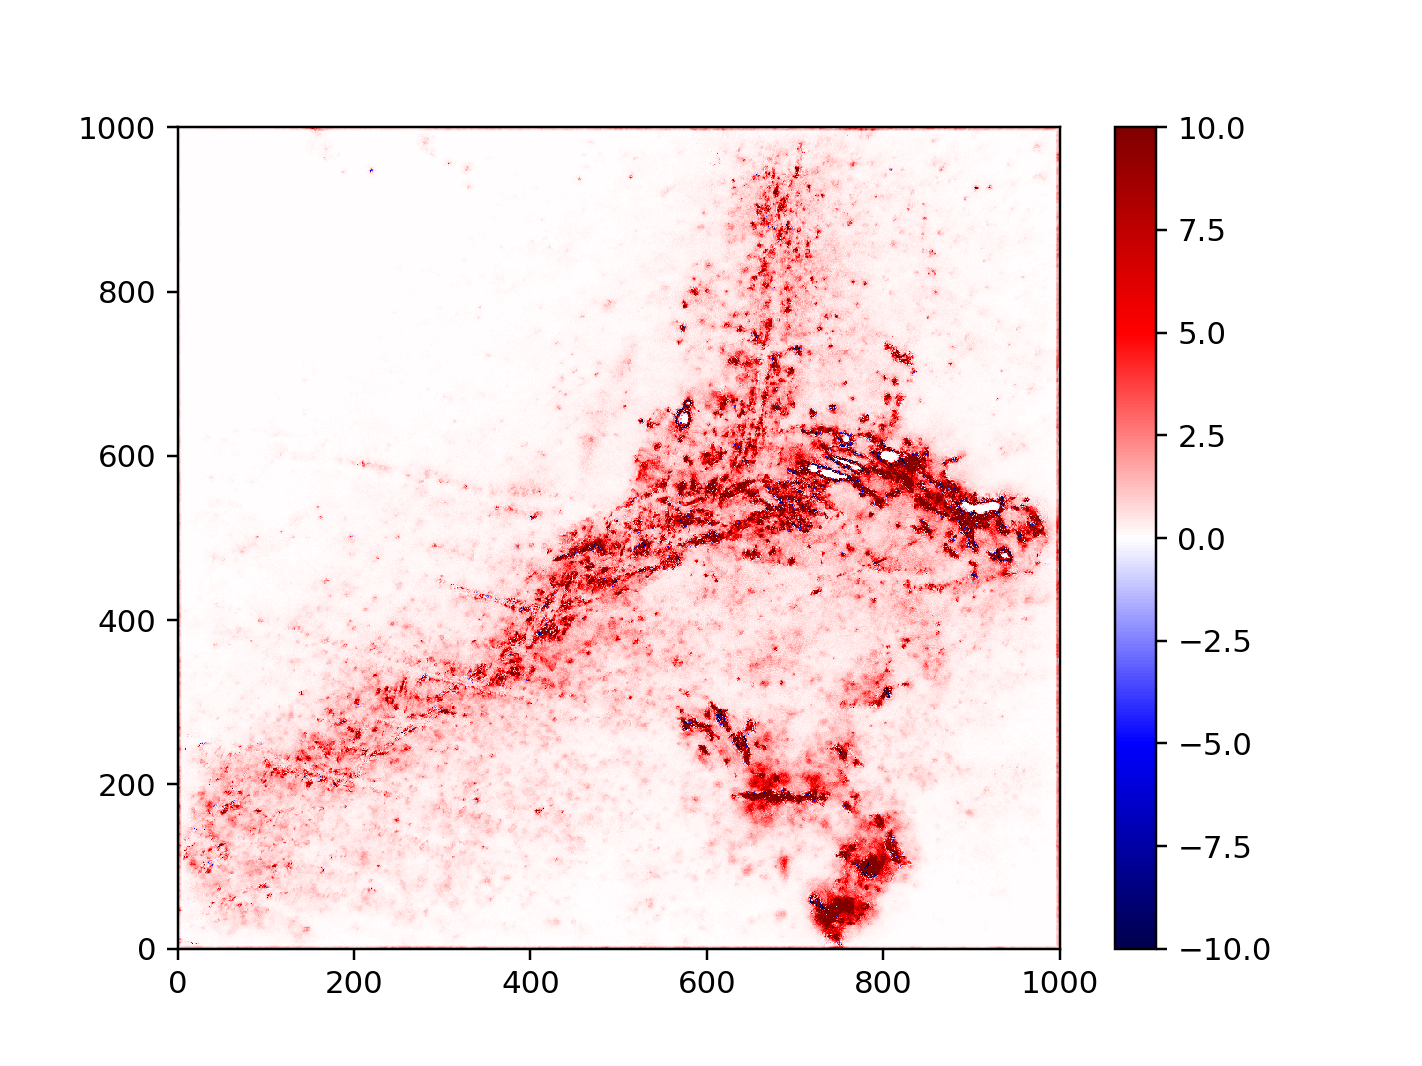

0.00108458


In [5]:
plt.pcolormesh(dape*1e3, vmin=-10, vmax=10, cmap="seismic")
plt.colorbar()
print(np.nanmean(dape))

<IPython.core.display.Javascript object>


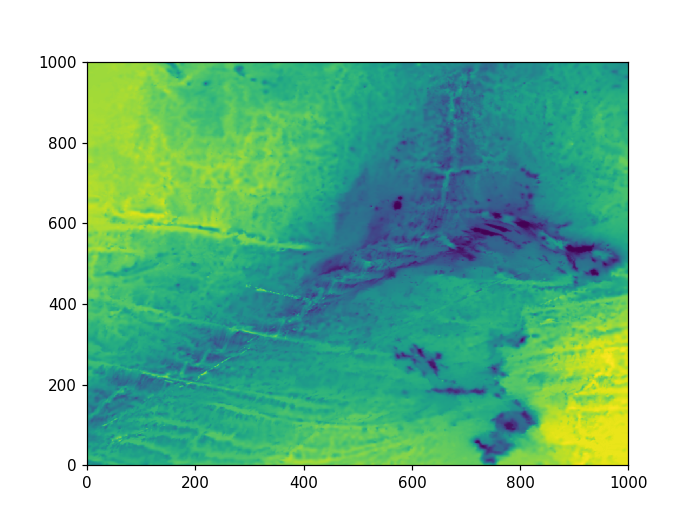

In [78]:
plt.figure()
plt.pcolormesh(topo)

In [53]:
jy = 75
nc = Dataset(filename, "r")
nsqr = nc.variables['nsqr'][:][:,jy,:]
bbase = nc.variables['bbase'][:][:,jy,:]
buoy = nc.variables['buoy'][:][:,:,jy,:]
brhs = nc.variables['brhs'][:,][:,:,jy,:]
nc.close()
zr = zlev.zlev_rho(topo[jy,:], np.zeros(nx), hc, Cs_r).T

<IPython.core.display.Javascript object>


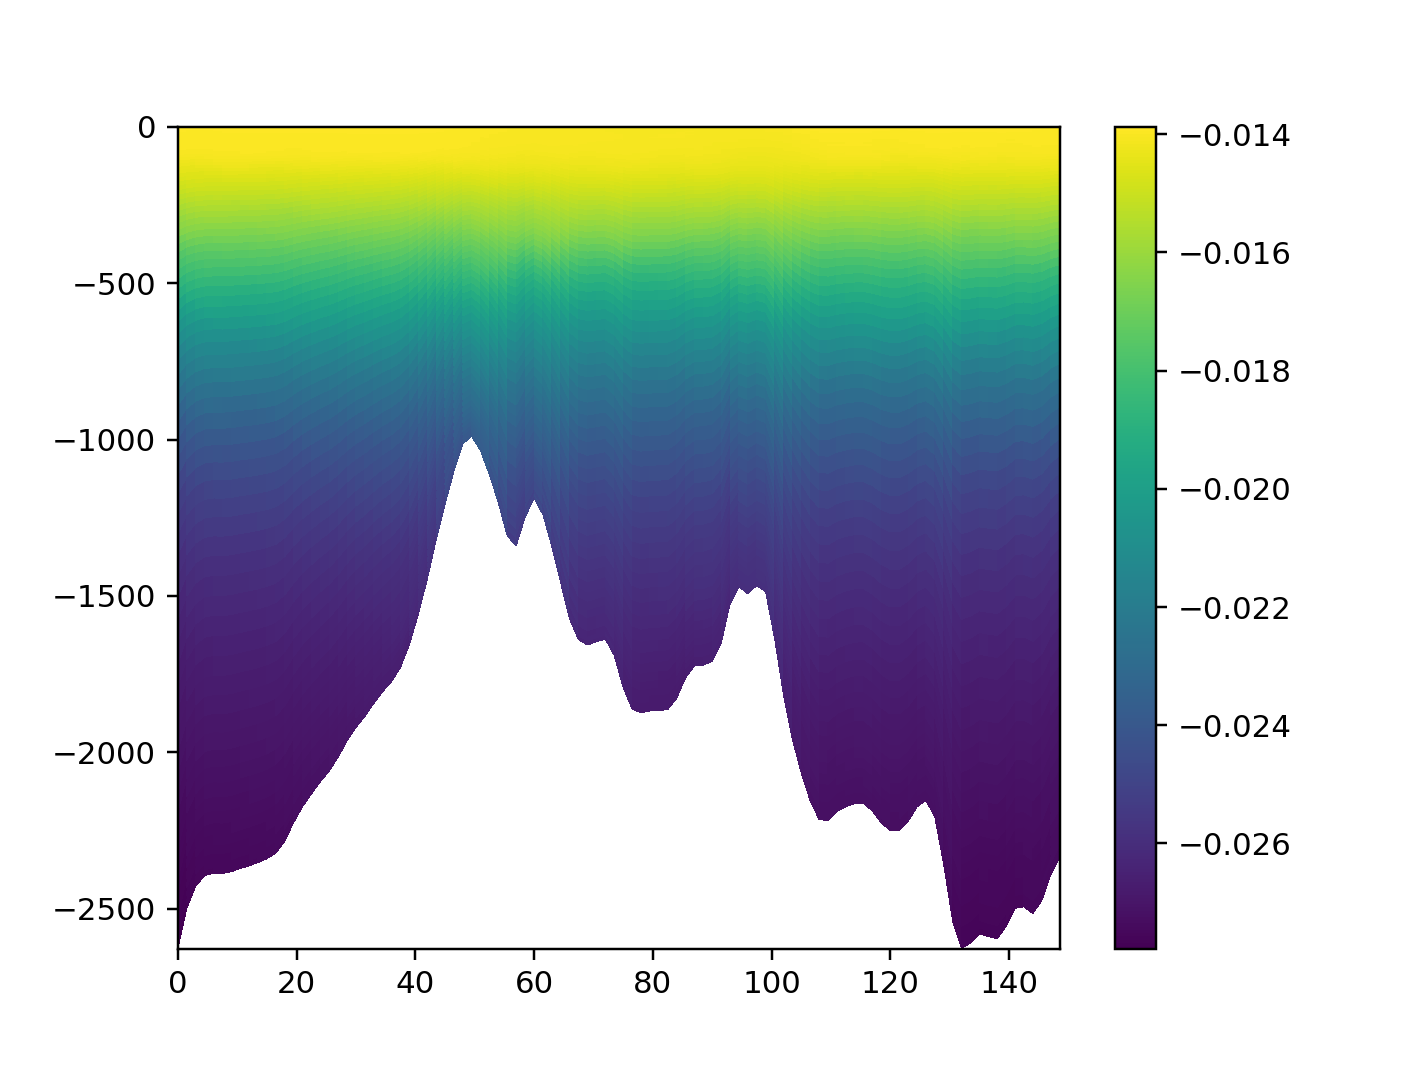

In [54]:
plt.figure()
plt.pcolormesh(xp, zr, bbase)
plt.colorbar()

In [57]:
jy, ix = 75, 45
nc = Dataset(filename, "r")
brhs = nc.variables['brhs'][:][:,:,jy,ix]
buoy = nc.variables['buoy'][:][:,:,jy,ix]
nc.close()


<IPython.core.display.Javascript object>


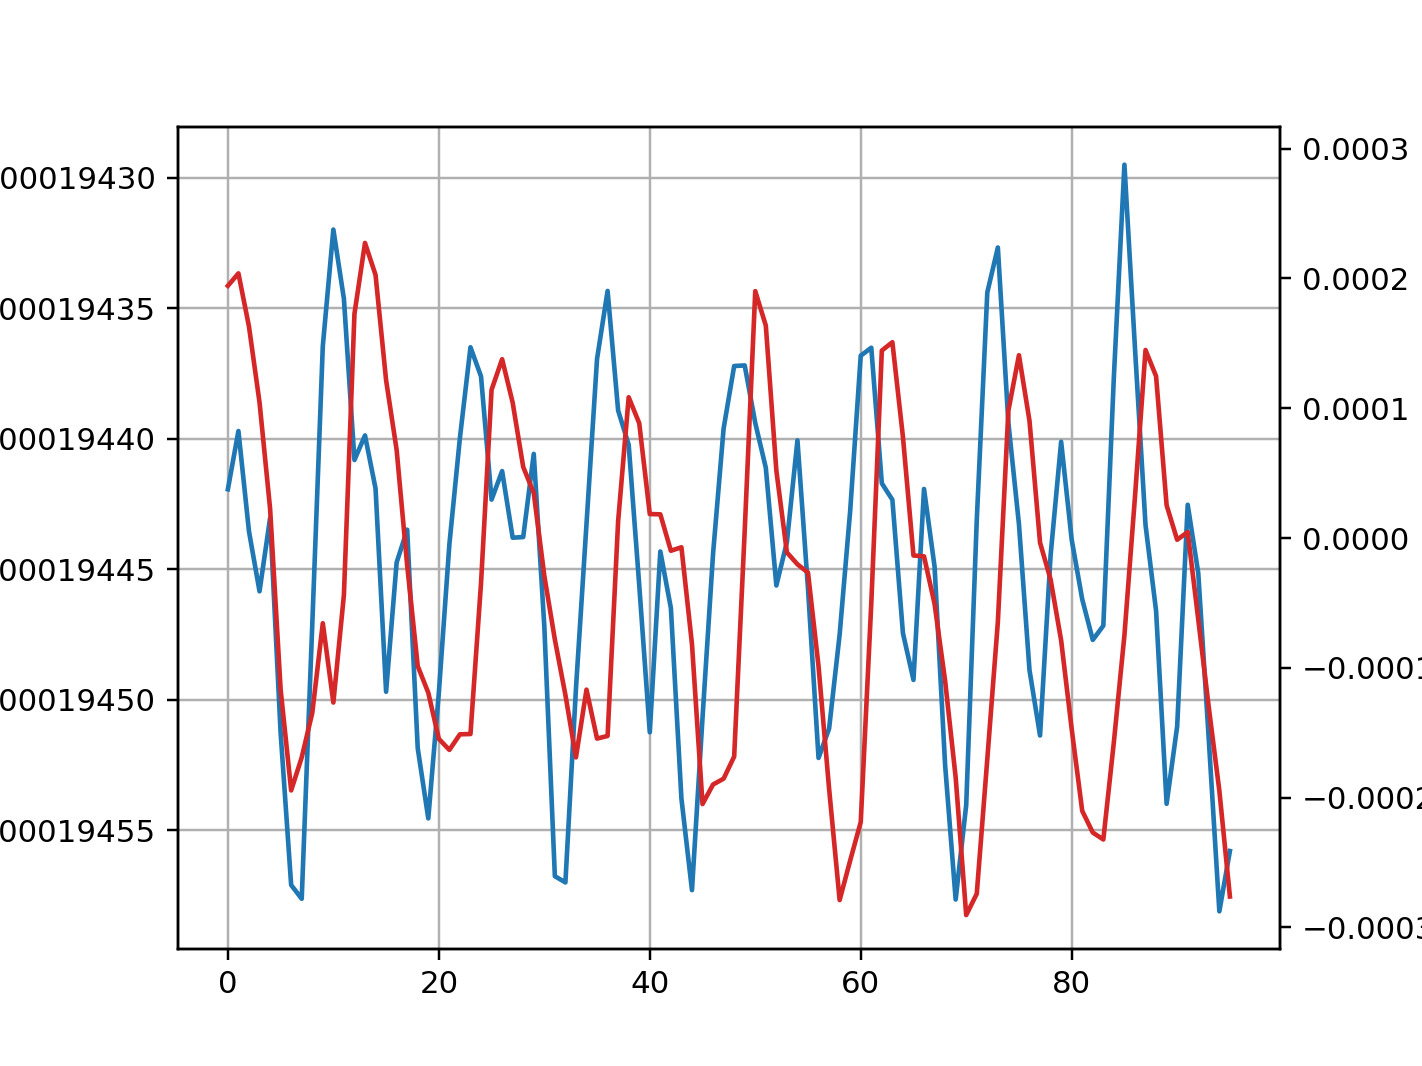

In [59]:
kz = 40

plt.figure()
ax = plt.gca()
ax.plot(brhs[:,kz])
#ax.set_ylim(np.array([-1,1])*max(abs(np.array(ax.get_ylim()))))
bx = ax.twinx()
bx.plot(buoy[:,kz], color="tab:red")
bx.set_ylim(np.array([-1,1])*max(abs(np.array(bx.get_ylim()))))

ax.grid(True)

In [56]:
brhs.shape

(96, 80, 100)